# Lending Club Case Study


## Import the necessary library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
bank_loan = pd.read_csv("loan.csv")

## Display the first five rows of the dataset

In [3]:
bank_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#Explore the data 
## Get basic information about the dataset

In [4]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Shape of the dataframe

In [5]:
bank_loan.shape

(39717, 111)

## Checking for missing values

In [6]:
bank_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Checking column with large amount of null values in percentage


In [7]:
print((bank_loan.isnull().sum()/bank_loan.shape[0]*100).round(2))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


## Removing the NULL value 

In [8]:
bank_loan.dropna(axis = 1, how = 'all', inplace = True)

## Checking columns again for null value percentage

In [9]:
print((bank_loan.isnull().sum()/bank_loan.shape[0]*100).round(2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

## Columns in the dataframe

In [10]:
print(bank_loan.columns)
bank_loan.shape

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

(39717, 57)

## Removing the irrelevant columns

In [11]:
bank_loan.drop(["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"], axis = 1, inplace = True)


In [12]:
bank_loan.shape

(39717, 41)

## Several columns contain only a single value, so they are not useful and will be dropped

In [13]:
print(bank_loan.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
collections_12_mths_ex_med        1
application_type                  1
pymnt_plan                        1
initial_list_status               1
policy_code                       1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
mths_since_last_record      

In [14]:
bank_loan = bank_loan.loc[:,bank_loan.nunique()>1]
bank_loan.shape

(39717, 32)

# Standardizing The Data By Univarient Analysis

## Distribution of Loan Status

In [15]:
bank_loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan Status')

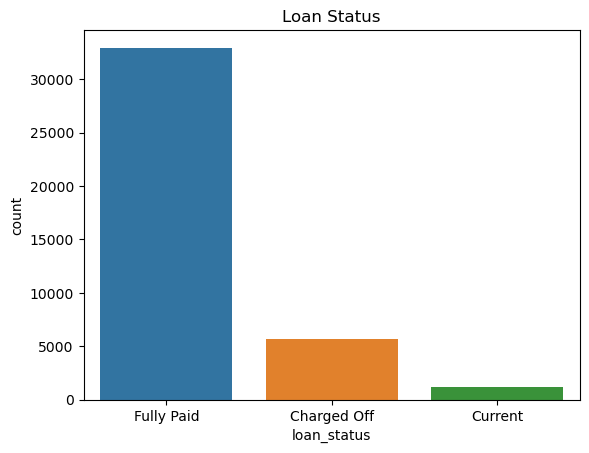

In [16]:
x = sns.countplot(x = 'loan_status', data = bank_loan)
x.set_title('Loan Status')

#### The number of defaulted loans is low compared to those that are fully paid.

## Distribution of Term for Loan Status

In [17]:
bank_loan['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Term For Loan Status')

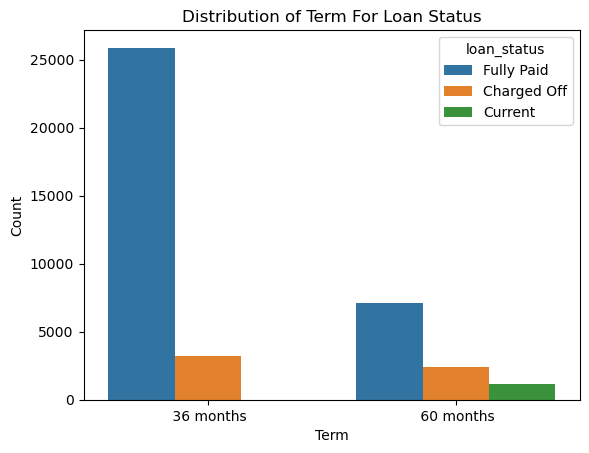

In [18]:
y = sns.countplot(x = 'term' , data =bank_loan, hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status')


#### Over half of the loans taken have a term of 36 months, in contrast to those with a 60-month term.

In [19]:
bank_loan = bank_loan[~(bank_loan['loan_status'] == 'Current')]
bank_loan.shape

(38577, 32)

## Distribution Of Interest Rate

In [20]:
bank_loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

Text(0.5, 1.0, 'Distribution of Interest Rate')

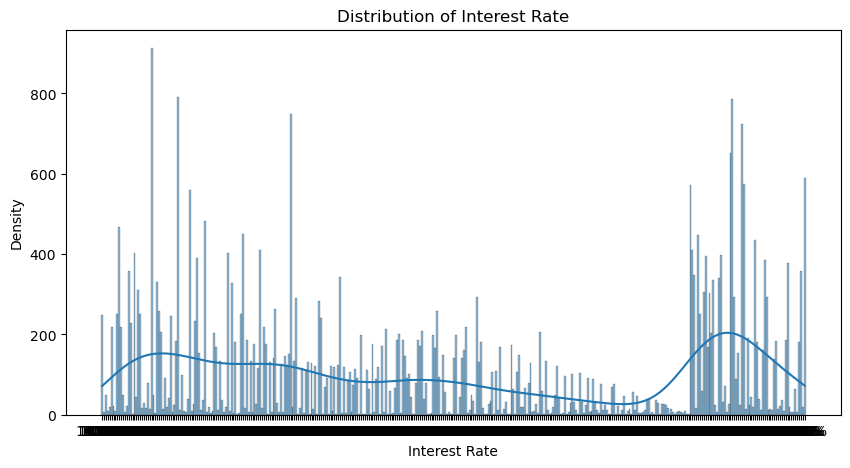

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(sorted(bank_loan.int_rate), kde=True, bins=10)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')

#### The interest rates are predominantly concentrated in the 5-10 and 10-15 ranges, with a noticeable dip around the 10% mark.

## Distribution of emp_length

In [22]:
bank_loan.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Employment Length')

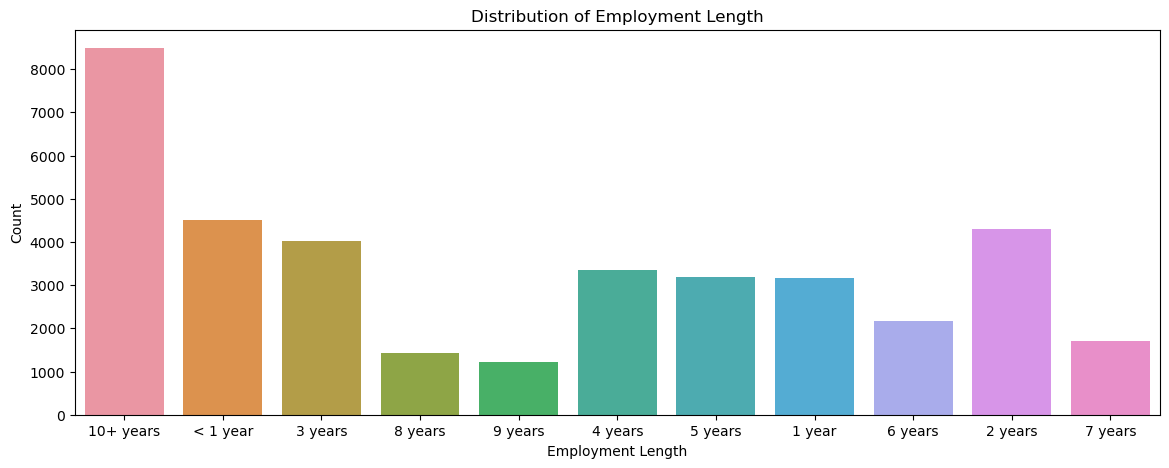

In [23]:
plt.figure(figsize=(14,5))
sns.countplot(x = 'emp_length' , data= bank_loan)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')


#### Most borrowers have more than 10 years of work experience

Text(0.5, 1.0, 'Distribution of Employment Length For Loan Status')

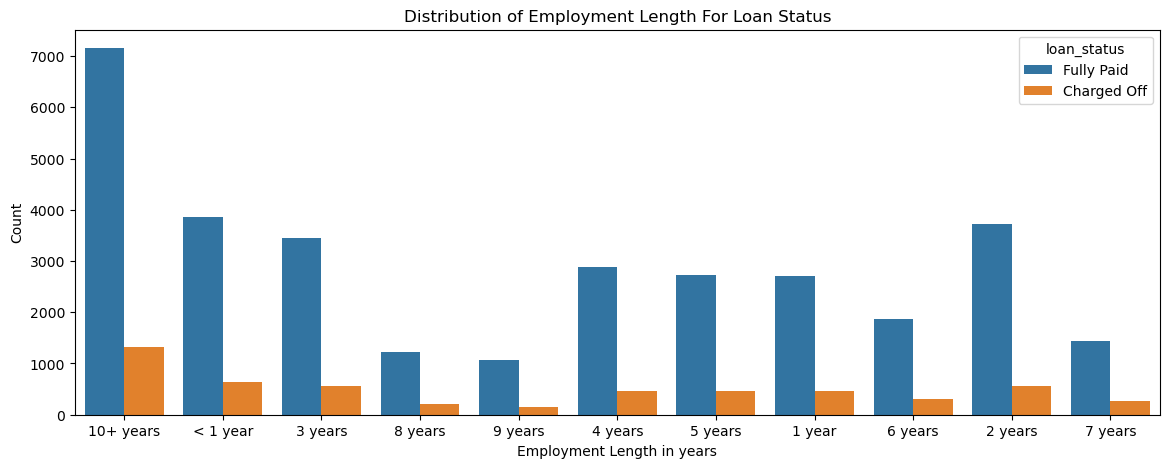

In [24]:
plt.figure(figsize=(14,5))
sns.countplot(data=bank_loan,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status')

#### Employees with over 10 years of experience are more likely to either default or fully repay their loans.

## Distribution of home_ownership

In [25]:
bank_loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Home Ownership')

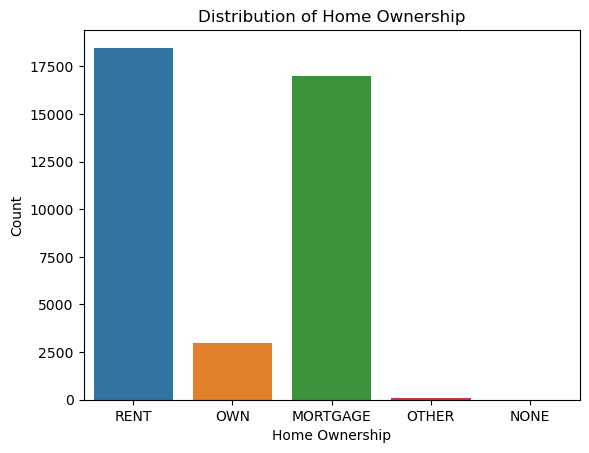

In [26]:
sns.countplot(x = 'home_ownership' , data= bank_loan)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')


#### The majority of borrowers do not own property and are either on a mortgage or renting.

## Distribution of Verification Status 

In [27]:
bank_loan['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Verification Status')

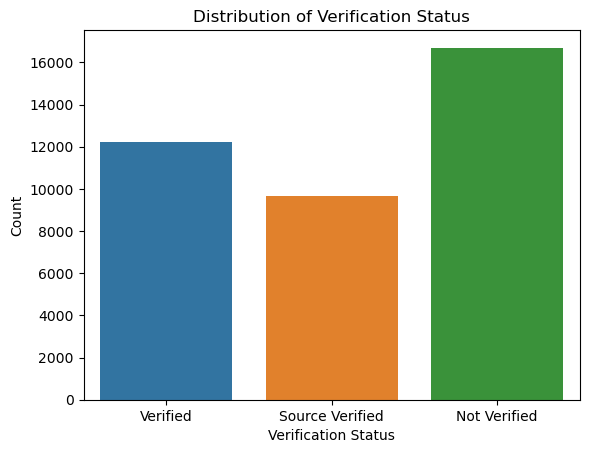

In [28]:
sns.countplot(x = 'verification_status' , data= bank_loan)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status')

#### Approximately 50% of the borrowers are either company-verified or have their income source verified.

## Distribution of annual_inc 

In [29]:
Distribution_of_annual_inc = bank_loan['annual_inc'].head()
print(Distribution_of_annual_inc)

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64


Text(0.5, 1.0, 'Distribution of Annual Income top 5')

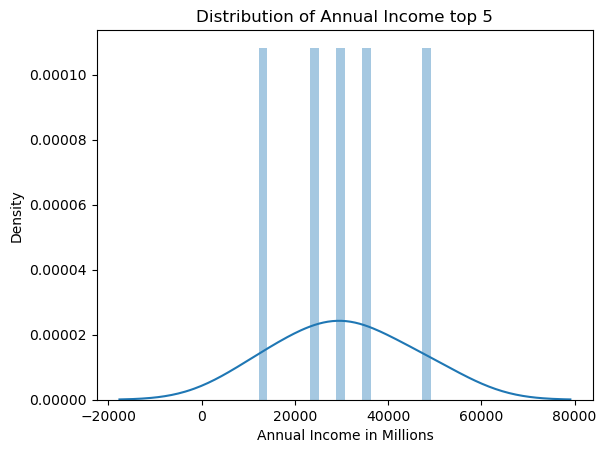

In [30]:
sns.distplot(Distribution_of_annual_inc,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income top 5')

#### Annual income exhibits a left-skewed distribution, indicating that the majority of borrowers have relatively low incomes compared to the rest.

## Distribution of purpose

In [31]:
bank_loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Purpose')

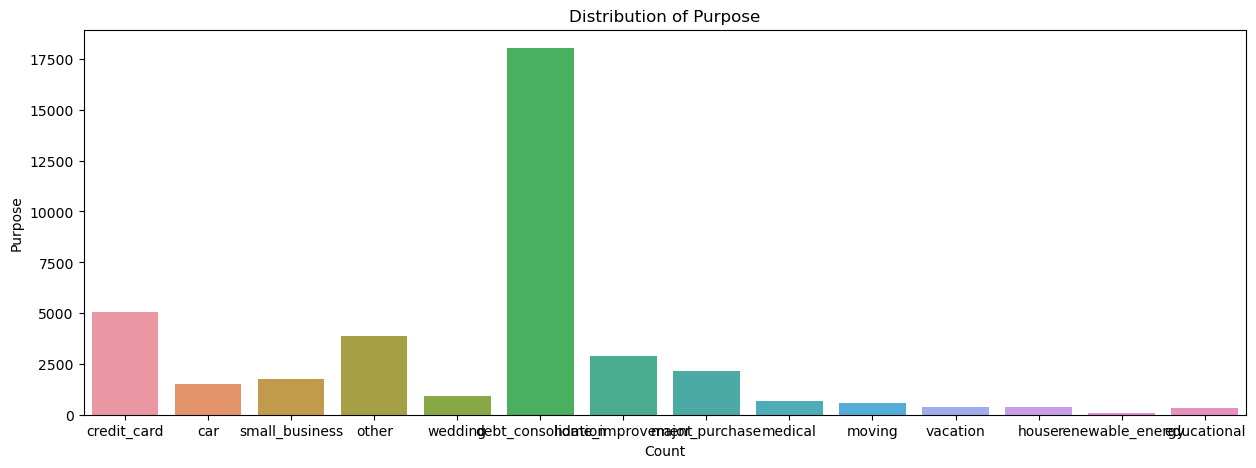

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'purpose' , data= bank_loan)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose')

#### A significant portion of loans are taken for debt consolidation, followed by credit card repayment.

## Distribution of issued month and year

In [33]:
df_month_year = bank_loan['issue_d'].str.partition("-", True)     
bank_loan['issue_month']=df_month_year[0]                       
bank_loan['issue_year']='20' + df_month_year[2]
bank_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,next_pymnt_d,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,3,0,13648,83.70%,9,NaN,0.0,Dec,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,3,0,1687,9.40%,4,NaN,0.0,Dec,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,2,0,2956,98.50%,10,NaN,0.0,Dec,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,10,0,5598,21%,37,NaN,0.0,Dec,2011
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,9,0,7963,28.30%,12,NaN,0.0,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

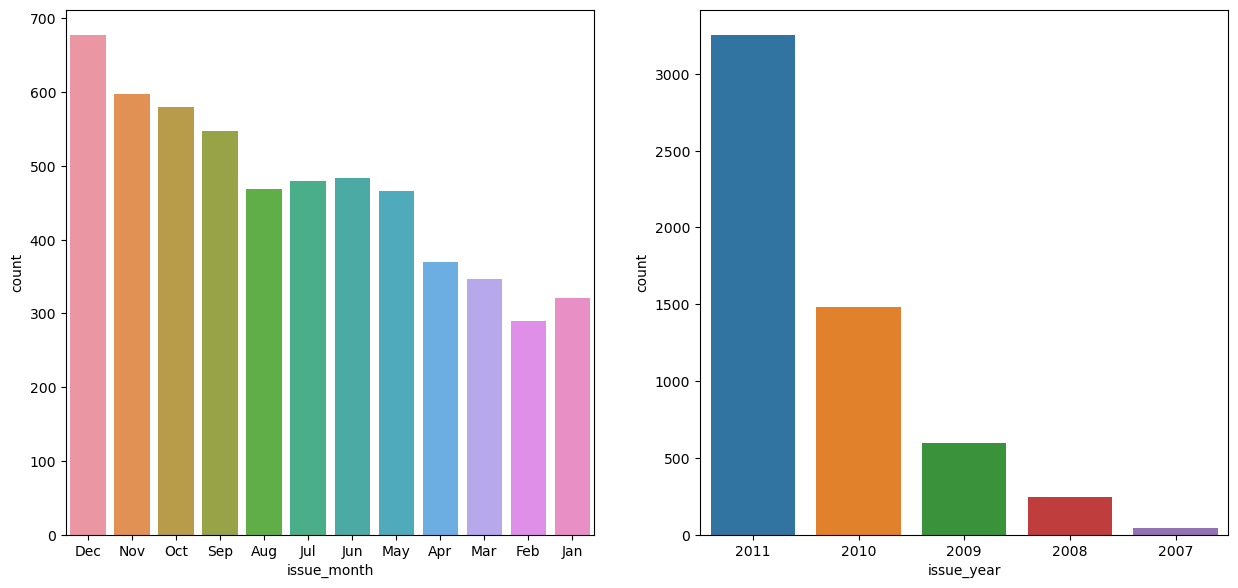

In [34]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=bank_loan[bank_loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=bank_loan[bank_loan['loan_status']=='Charged Off'])

#### The highest number of defaults occurred when loans were issued in December. Additionally, loans issued in 2011 saw a higher default rate compared to other years.

## Distribution of Term based on Grade

In [35]:
bank_loan['grade'].value_counts(ascending=True)

grade
G      299
F      976
E     2663
D     5085
C     7834
A    10045
B    11675
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Term For Grade')

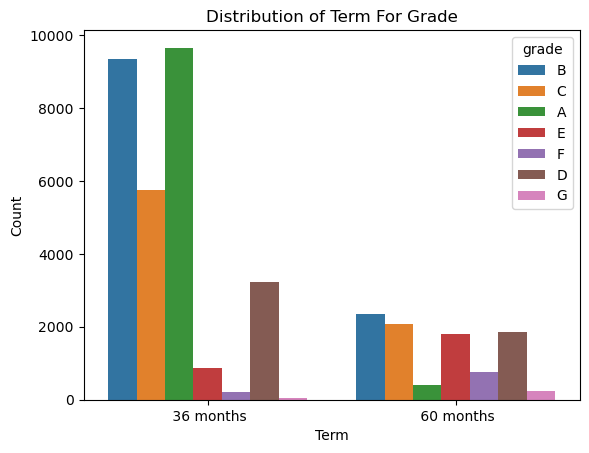

In [36]:
sns.countplot(data=bank_loan,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade')

#### Loans with a 36-month term are primarily composed of grade A and B loans, while loans with a 60-month term mostly consist of grade B, C, and D loans

# Standardizing The Data By Bivariate  Analysis 

## Annual income vs loan purpose

In [37]:
data_summary = bank_loan.groupby(['annual_inc', 'purpose', 'loan_status']).size().reset_index(name='count')
top_values = data_summary.sort_values(by='annual_inc' , ascending= False). head() 
print(top_values)

       annual_inc             purpose loan_status  count
10301   6000000.0    home_improvement  Fully Paid      1
10300   3900000.0    home_improvement  Fully Paid      1
10299   2039784.0  debt_consolidation  Fully Paid      1
10298   1900000.0         credit_card  Fully Paid      1
10297   1782000.0  debt_consolidation  Fully Paid      1


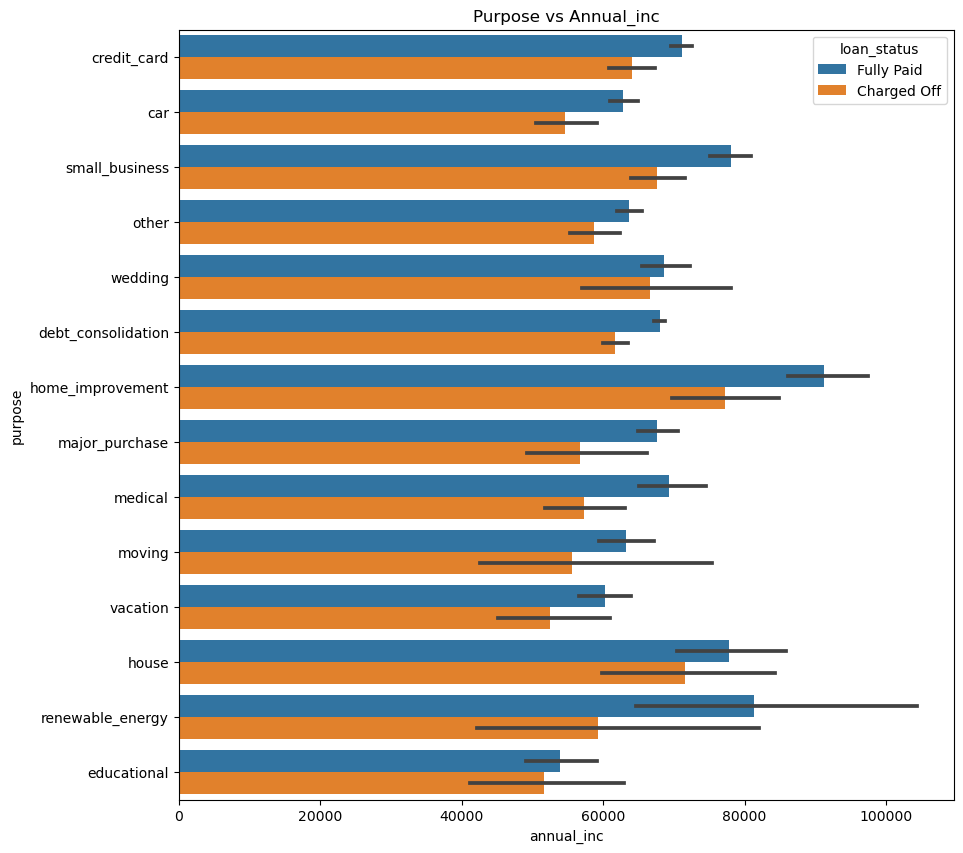

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(data =bank_loan,x='annual_inc', y='purpose', hue ='loan_status')
plt.title('Purpose vs Annual_inc')
plt.show()

#### Applicants with higher salaries predominantly applied for loans related to 'home improvement' 'house' and 'renewable energy'.

## Annual Income vs Loan amount

In [39]:
bank_loan['annual_inc_group'] =  pd.cut(bank_loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [40]:
data_summary2 = bank_loan.groupby('annual_inc_group') ['loan_amnt'].sum().reset_index(name = 'Loan Amount')
annual_income = data_summary2.sort_values(by= 'annual_inc_group', ascending= True). head() 
print(annual_income)

  annual_inc_group  Loan Amount
0           3k-31k    426080350
1          31k-58k        50750
2          58k-85k            0
3         85k-112k        25000
4        112k-140k         5000


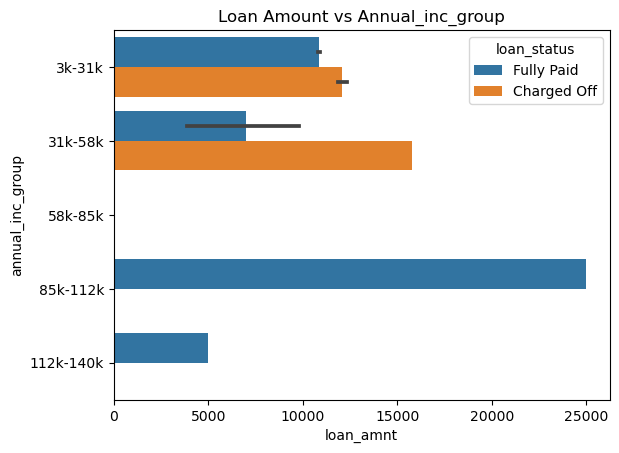

In [41]:
sns.barplot(x = "loan_amnt", y = "annual_inc_group", hue = 'loan_status', data = bank_loan)
plt.title('Loan Amount vs Annual_inc_group')
plt.show()

#### Borrowers in the $85k to $112k annual income bracket have the largest loan amounts.

## Annual Income vs Home Ownership

In [42]:
home_ownership_vs_annual = bank_loan.groupby('home_ownership')['annual_inc'].sum().reset_index()
top_home_ownership_vs_annual = home_ownership_vs_annual.sort_values(by = 'annual_inc' , ascending = True).head()
print(top_home_ownership_vs_annual)

  home_ownership    annual_inc
1           NONE  2.422000e+05
2          OTHER  6.988352e+06
3            OWN  1.751923e+08
4           RENT  1.057724e+09
0       MORTGAGE  1.413101e+09


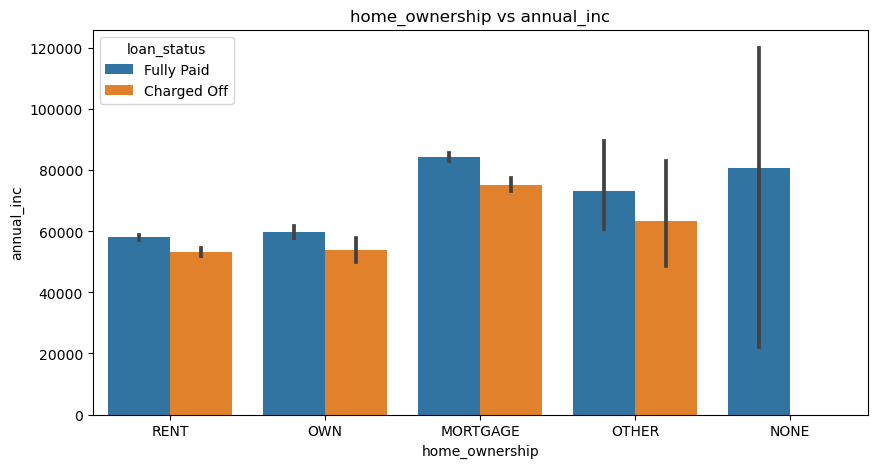

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(data =bank_loan,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.title('home_ownership vs annual_inc')
plt.show()

#### Borrowers with a mortgage tend to have the highest annual income compared to other home ownership types

## Loan Amount vs Emp_Length 

In [44]:
##Loan Amount vs emp_length
loan_amount_vs_emp_length = bank_loan.groupby('emp_length')['loan_amnt'].sum().reset_index()
total_loan_amount_vs_emp_length = loan_amount_vs_emp_length.sort_values(by = 'loan_amnt' , ascending = True)
print(total_loan_amount_vs_emp_length)

   emp_length  loan_amnt
9     9 years   14593450
8     8 years   16849125
7     7 years   19787900
6     6 years   24655575
0      1 year   31870075
5     5 years   35498375
4     4 years   36225050
3     3 years   42674625
10   < 1 year   43150325
2     2 years   43444475
1   10+ years  108715150


In [45]:
##Loan Amount vs Verification status 
loan_amount_vs_verification_status = bank_loan.groupby('verification_status')['loan_amnt'].sum().reset_index()
total_loan_amount_vs_verification_status = loan_amount_vs_verification_status.sort_values(by = 'verification_status' , ascending = True)
print(total_loan_amount_vs_verification_status)

  verification_status  loan_amnt
0        Not Verified  140011825
1     Source Verified   96485925
2            Verified  189663350


Text(0.5, 1.0, 'Emp_length vs Loan Amount')

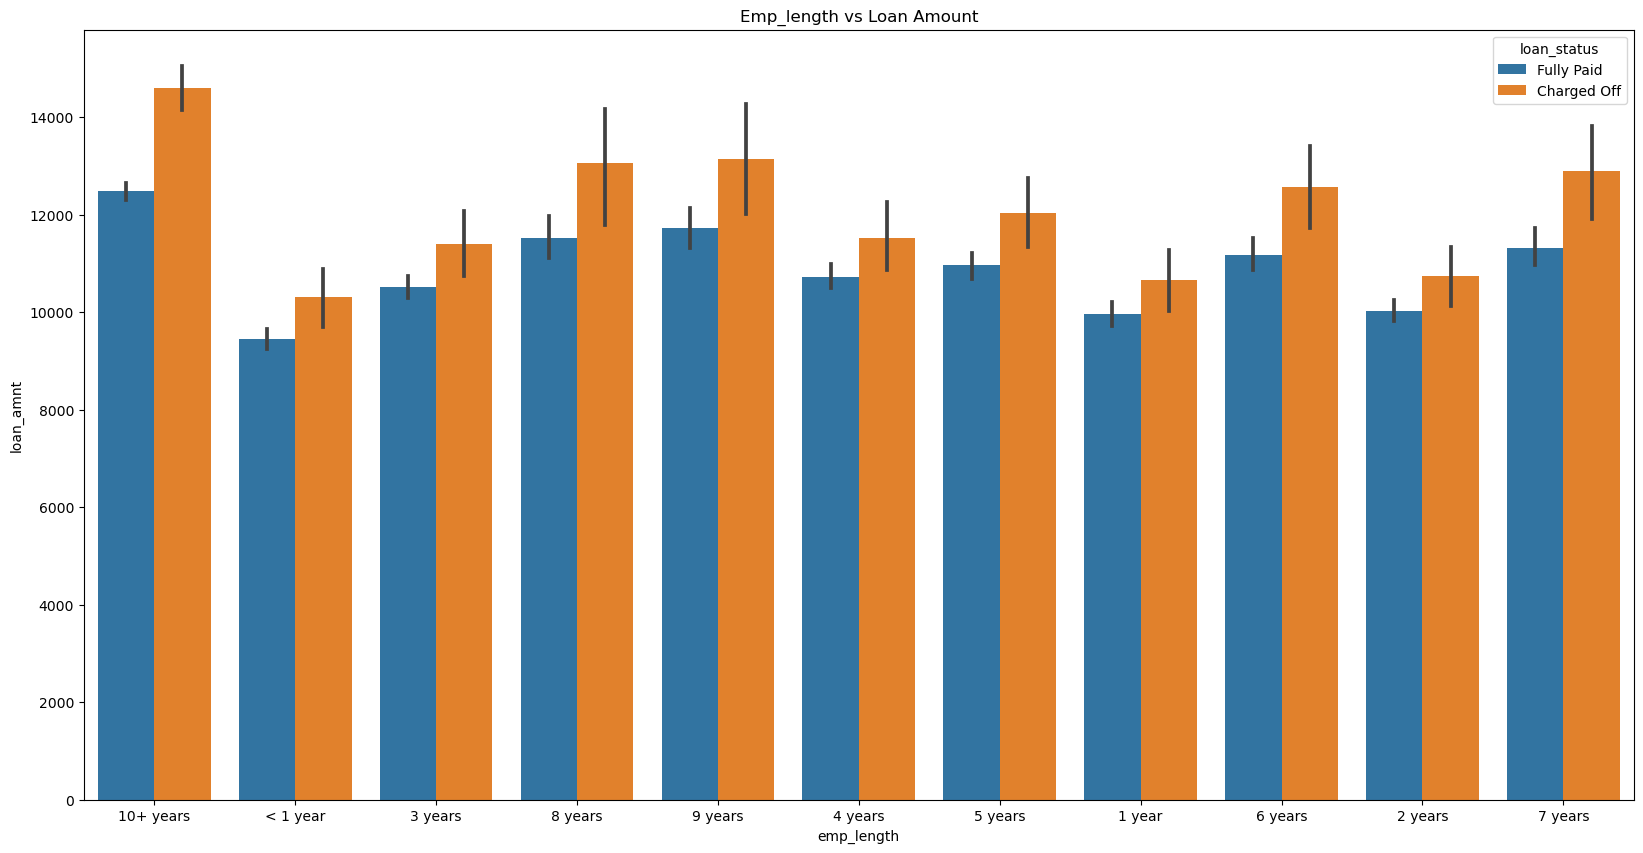

In [46]:
plt.figure(figsize=(20,10))
sns.barplot(data =bank_loan,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.title('Emp_length vs Loan Amount')

#### Employees with longer working history got the loan approved for a higher amount.

## Loan Amount vs Verification_Status

Text(0.5, 1.0, 'Verification_status vs Loan Amount')

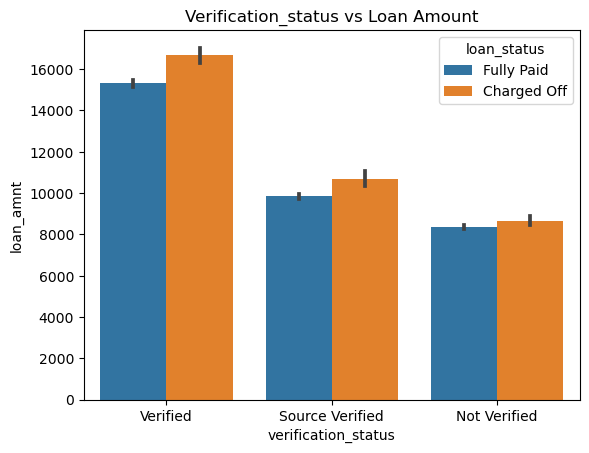

In [47]:
sns.barplot(data =bank_loan,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.title('Verification_status vs Loan Amount')

#### The verification status indicates that there are more verified loans, with a total amount of 189,663,350, compared to other statuses.

## Term vs Loan Amount

In [48]:
term_vs_loan_Amount = bank_loan.groupby('term')['loan_amnt'].sum().reset_index()
total_term_vs_loan_Amount = term_vs_loan_Amount.sort_values(by = 'term' , ascending = True)
print(total_term_vs_loan_Amount)

         term  loan_amnt
0   36 months  279116075
1   60 months  147045025


Text(0.5, 1.0, 'Term vs Loan Amount')

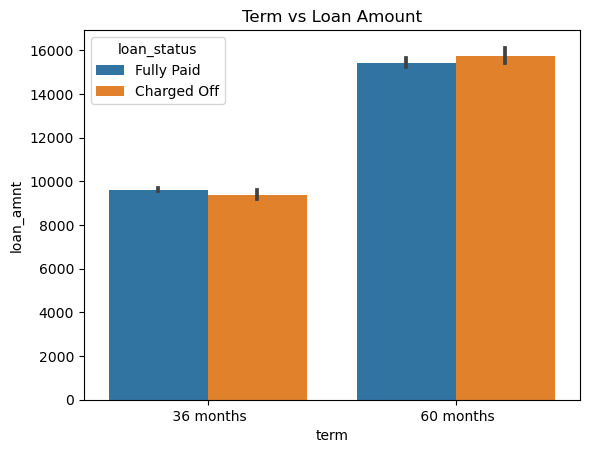

In [49]:
sns.barplot(x = 'term', y = 'loan_amnt', data = bank_loan,hue = 'loan_status')
plt.title('Term vs Loan Amount')

#### The majority of loan amounts are associated with a 36-month term, in comparison to a 60-month term.

## Distribution of Loan Amount for Loan Status

In [50]:
loan_amount_loan_status = bank_loan.groupby('loan_status')['loan_amnt'].sum().reset_index()
total_loan_amount_loan_status = loan_amount_loan_status.sort_values(by = 'loan_status' , ascending = True)
print(total_loan_amount_loan_status)

   loan_status  loan_amnt
0  Charged Off   68111375
1   Fully Paid  358049725


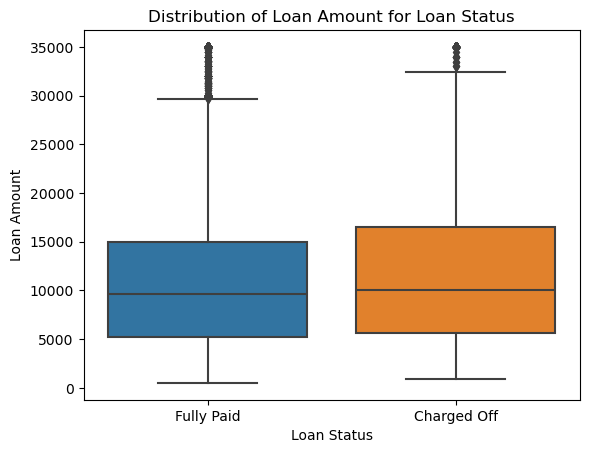

In [51]:
sns.boxplot(data=bank_loan,x='loan_status',y='loan_amnt')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amount for Loan Status')
plt.show()

#### The total fully paid amount, at 358,049,725, is significantly larger compared to the charged-off amount, indicating a higher proportion of successfully repaid loans.

## Comparison of interest rate based on grade.

In [52]:
interest_rate_based_on_grade = bank_loan.groupby('grade')['int_rate'].sum().reset_index()
total_interest_rate_based_on_grade = interest_rate_based_on_grade.sort_values(by = 'grade' , ascending = True)
print(total_interest_rate_based_on_grade)

  grade                                           int_rate
0     A  7.90%6.03%6.03%7.51%7.90%8.90%7.90%7.51%7.90%6...
1     B  10.65%12.69%12.69%9.91%10.65%11.71%12.42%11.71...
2     C  15.27%15.96%13.49%15.96%14.65%13.49%15.27%15.2...
3     D  16.29%16.77%18.25%16.77%16.77%17.27%16.77%17.2...
4     E  18.64%19.91%19.91%19.91%19.42%19.91%20.30%18.6...
5     F  21.28%21.28%21.67%20.89%20.89%21.67%21.28%21.2...
6     G  23.91%23.13%22.74%23.91%23.91%24.11%23.13%24.1...


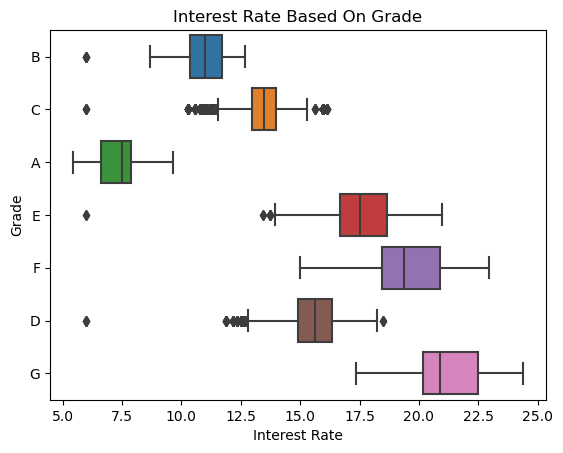

In [53]:
bank_loan['int_rate'] = bank_loan['int_rate'].str.replace('%', '').astype(float)
sns.boxplot(data=bank_loan,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Interest Rate Based On Grade')
plt.show()

#### The B grade loans, with an amount of 128,515.86, carry higher interest rates compared to other grades

## Comparison of DTI over grade for loan status

In [54]:
DTI_over_grade_for_loan_status = bank_loan.groupby('grade')['dti'].sum().reset_index()
total_DTI_over_grade_for_loan_status = DTI_over_grade_for_loan_status.sort_values(by = 'grade' , ascending = True)
print(total_DTI_over_grade_for_loan_status)

  grade        dti
0     A  120994.50
1     B  156264.41
2     C  108522.65
3     D   70801.46
4     E   37375.76
5     F   13866.86
6     G    4196.35


Text(0.5, 1.0, 'DTI Based On Grade For Loan Status')

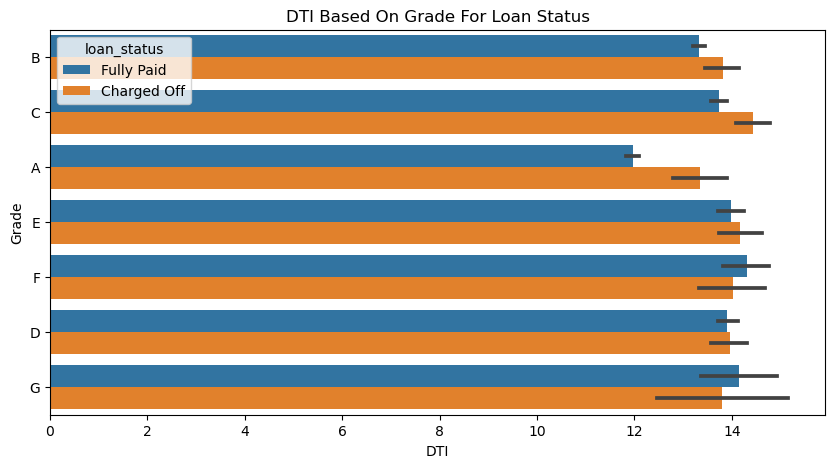

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data=bank_loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI Based On Grade For Loan Status')

#### The B grade loans, with a DTI of 156,264.41, have a higher debt-to-income ratio compared to other grades.

## Distribution of Interest Rate based on Loan Status

In [56]:
dtb_int_amnt_based_on_loan_status = bank_loan.groupby('loan_status')['int_rate'].sum().reset_index(name ='Total Interest')
total_dtb_int_amnt_based_on_loan_status = dtb_int_amnt_based_on_loan_status.sort_values(by = 'loan_status' , ascending = True)
print(dtb_int_amnt_based_on_loan_status)

   loan_status  Total Interest
0  Charged Off        77767.57
1   Fully Paid       382541.63


Text(0.5, 1.0, 'Distribution of Interest Rate For Loan Status')

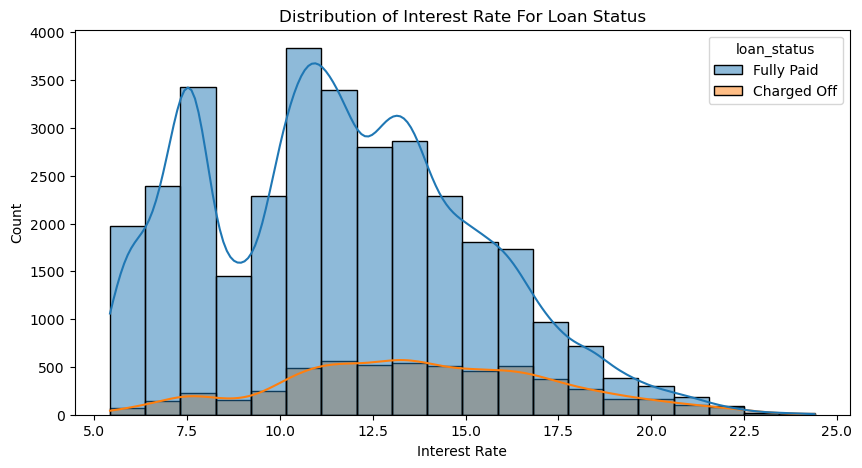

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=bank_loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status')

#### Loan amounts increase with interest rates up to 17.5%, then decline, suggesting higher rates deter borrowing

## Distribution Of Loan Status for Issue Year

Text(0.5, 1.0, 'Distribution Of Loan Status for Issue Year')

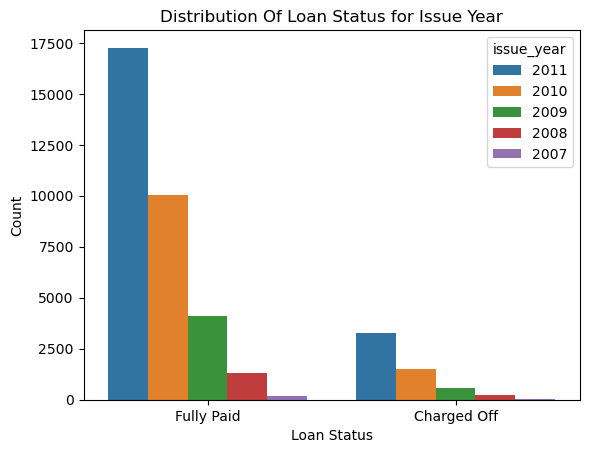

In [58]:
sns.countplot(data=bank_loan,x='loan_status',hue='issue_year')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution Of Loan Status for Issue Year')

#### The exponential increase in loans over the years suggests a significant rise in the debt-to-income (DTI) ratio, while the rate of loan defaults is decreasing.


## Observations about this analysis

### Univariate Analysis

   * The number of fully paid loans is significantly higher compared to loans that are either charged-off or still current.
   * Over half of the loans taken have a term of 36 months, in contrast to those with a 60-month term.
   * The interest rates are predominantly concentrated in the 5-10 and 10-15 ranges, with a noticeable dip around the 10% mark.
   * Most borrowers have more than 10 years of work experience.
   * Employees with over 10 years of experience are more likely to either default or fully repay their loans.
   * The majority of borrowers do not own property and are either on a mortgage or renting.
   * Approximately 50% of the borrowers are either company-verified or have their income source verified.
   * Annual income exhibits a left-skewed distribution, indicating that the majority of borrowers have relatively low incomes compared to the rest.
   * A significant portion of loans are taken for debt consolidation, followed by credit card repayment.
   * The highest number of defaults occurred when loans were issued in December. Additionally, loans issued in 2011 saw a higher default rate compared to other years.
   * Loans with a 36-month term are primarily composed of grade A and B loans, while loans with a 60-month term mostly consist of grade B, C, and D loans

### Bivariate Analysis

   * Applicants with higher salaries predominantly applied for loans related to 'home improvement' 'house' and 'renewable energy'.
   * Borrowers in the $85k to $112k annual income bracket have the largest loan amounts.
   * Borrowers with a mortgage tend to have the highest annual income compared to other home ownership types
   * Employees with longer working history got the loan approved for a higher amount.
   * The verification status indicates that there are more verified loans, with a total amount of 189,663,350, compared to other statuses.
   * The majority of loan amounts are associated with a 36-month term, in comparison to a 60-month term.
   * The total fully paid amount, at 358,049,725, is significantly larger compared to the charged-off amount, indicating a higher proportion of successfully repaid loans.
   * The B grade loans, with an amount of 128,515.86, carry higher interest rates compared to other grades
   * The B grade loans, with a DTI of 156,264.41, have a higher debt-to-income ratio compared to other grades
   * Loan amounts increase with interest rates up to 17.5%, then decline, suggesting higher rates deter borrowing
   * The exponential increase in loans over the years suggests a significant rise in the debt-to-income (DTI) ratio, while the rate of loan defaults is decreasing.

## Conclusions 

    1) Loan Tenure and Default Risk: 
        * Loans with a 60-month term appear to be riskier compared to 36-month loans, as they include more B, C, and D grade loans, which are generally associated with higher interest rates and debt-to-income (DTI) ratios.

    2) Income and Loan Behavior:
        * Borrowers with higher annual incomes tend to take out larger loans, especially for home-related improvements and renewable energy projects.
        * Despite higher incomes, the propensity to default seems higher in certain income brackets, such as the $85k to $112k range. Income alone isn't a perfect indicator of repayment capacity.

    3) Employment and Risk:
        * Applicants with more than 10 years of work experience make up a large portion of both fully paid and defaulted loans, suggesting that work experience alone isn't a decisive factor in loan approval.
        * However, those with longer employment histories tend to be approved for larger loans, potentially leading to increased default risk due to higher financial burdens.
        
    4) Interest Rate Impact: 
        * Loans with interest rates up to 17.5% are more common, but beyond this threshold, the number of loans decreases, implying higher rates may deter borrowers. However, these higher interest loans are riskier, as they are more likely to lead to default.

    5) Debt-to-Income Ratio (DTI):
        * Higher DTI ratios, particularly in B grade loans, are correlated with increased loan amounts and default rates. This indicates that borrowers taking on larger loans relative to their income are at greater risk of default.

    6) Homeownership and Borrower Risk:
        * Borrowers with mortgages tend to have higher incomes, but homeownership status (especially renting or mortgages) doesn't offer strong protection against default.
        * Non-homeowners and those renting may face additional financial pressures, making them more prone to default.
        
    7) Verification Status and Loan Performance: 
        * Verified loans have higher total amounts, and a large number of fully paid loans fall into this category. This suggests that income verification might correlate with better repayment outcomes.

    8) Loan Purpose and Default: 
        * Loans taken out for debt consolidation and credit card repayment make up a significant portion of both fully paid and defaulted loans. These loans may represent higher-risk borrowers attempting to manage existing debt, increasing their default likelihood.

    9) Seasonal and Temporal Trends:
        * Loans issued in December have a higher default rate, potentially indicating seasonal financial strain or year-end budgetary issues for borrowers.
        * The year 2011 showed higher default rates, which could be reflective of macroeconomic conditions or specific changes in lending policies.
        
    10) Increasing Loan Demand vs. Declining Default Rates:
        * Over time, the number of loans has increased, but default rates have declined, indicating possible improvements in lending practices or risk assessment strategies. However, the increase in the DTI ratio suggests rising financial pressure on borrowers.

## Overall Strategic Implications:

        * Lending strategies should be adjusted to account for the increased risk in 60-month loans, higher DTI ratios, and loans issued at the end of the year.
        * While income is an important factor, it cannot be the sole determinant in assessing borrower risk. A combination of variables, including DTI, loan term, and verification status, should be used to make more accurate risk assessments.
        * Additional precautions (e.g., higher interest rates or smaller loan amounts) should be taken when lending to borrowers taking out loans for debt consolidation or credit card repayment, as these tend to be high-risk categories.